# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
#Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import accuracy_score

In [3]:
#Loading dataset
df=pd.read_csv('Titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#EDA processing

In [6]:
df.ndim

2

In [7]:
df.shape

(891, 12)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age']=df['Age'].replace(np.nan,df['Age'].mean())

In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Embarked'].mode()

0    S
dtype: object

In [13]:
df['Embarked']=df['Embarked'].replace(np.nan,'S')

In [14]:
df['Embarked'].isnull().sum()

0

In [15]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [16]:
df['Cabin']=df['Cabin'].replace(np.nan,'G6')

In [17]:
df['Cabin'].isnull().sum()

0

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262C3C13748>]],
      dtype=object)

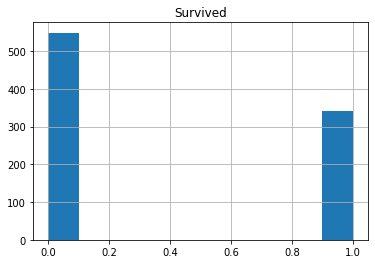

In [19]:
df.hist('Survived')

<BarContainer object of 891 artists>

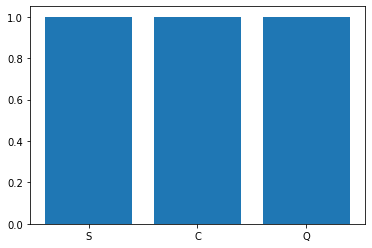

In [20]:
plt.bar(df['Embarked'],df['Survived'])

<BarContainer object of 891 artists>

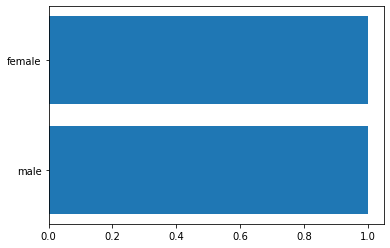

In [21]:
plt.barh(df['Sex'],df['Survived'])

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le= LabelEncoder()

In [24]:
df['Sex']=le.fit_transform(df['Sex'])

In [25]:
df['Ticket']=le.fit_transform(df['Ticket'])

In [26]:
df['Cabin']=le.fit_transform(df['Cabin'])

In [27]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [28]:
df=df.drop(['Name','PassengerId'], axis=1)

In [29]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,1,27.000000,0,0,101,13.00,145,2
887,1,1,0,19.000000,0,0,14,30.00,30,2
888,0,3,0,29.699118,1,2,675,23.45,145,2
889,1,1,1,26.000000,0,0,8,30.00,60,0
890,0,3,1,32.000000,0,0,466,7.75,145,1


In [30]:
#Statistical summary
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,129.202020,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,35.330727,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,145.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,145.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,145.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [31]:
#Checking correlation
corr=df.corr()

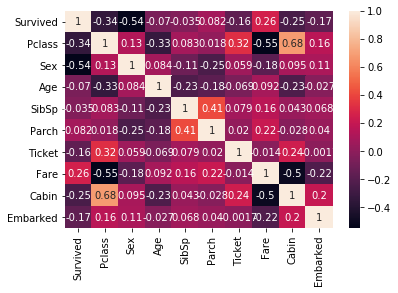

In [32]:
sns.heatmap(corr, annot= True)

In [33]:
#Splitting independent & target variable in X & Y

In [34]:
x=df.drop('Survived', axis=1)

In [35]:
y=df['Survived']

In [36]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,145,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,145,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,145,2


In [37]:
#checking outliers

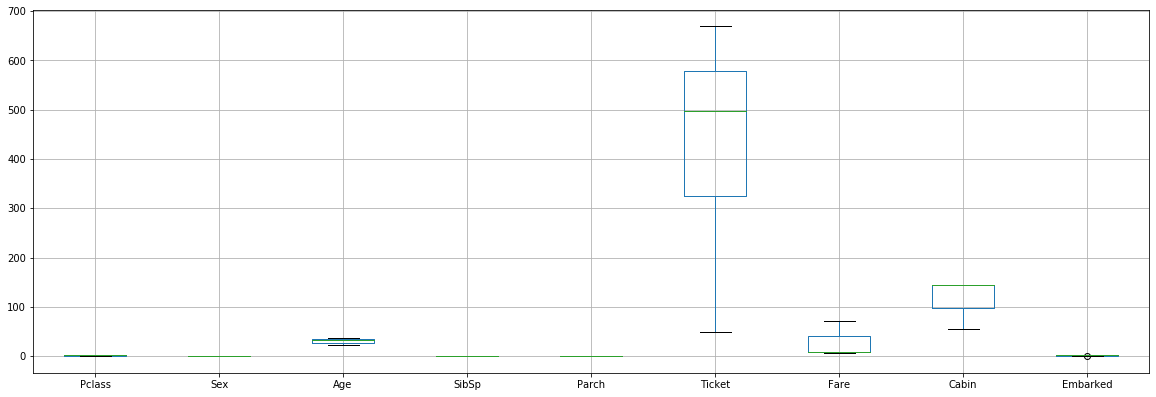

In [38]:
x.iloc[0:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

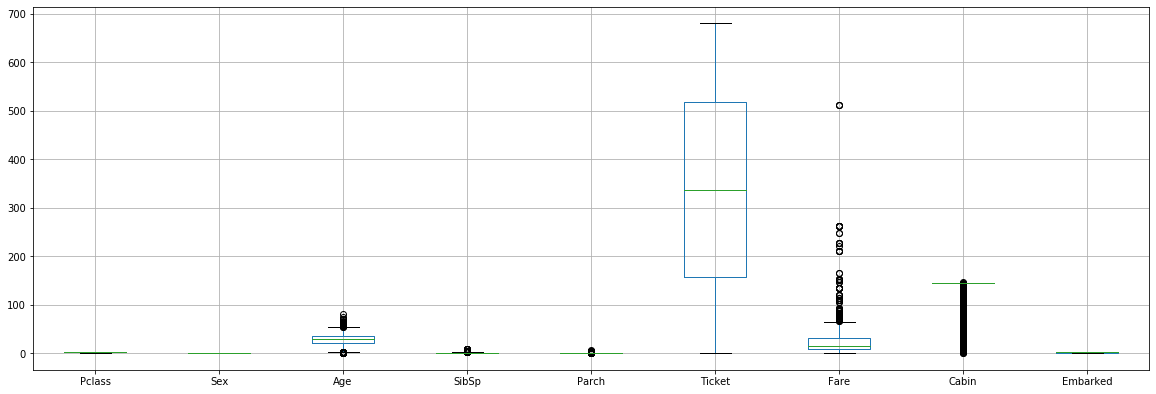

In [39]:
x.iloc[6::].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [40]:
from scipy import stats

In [41]:
x['Age']=stats.zscore(x['Age'])

In [42]:
x['SibSp']=stats.zscore(x['SibSp'])

In [43]:
x['Parch']=stats.zscore(x['Parch'])

In [44]:
x['Fare']=stats.zscore(x['Fare'])

In [45]:
x['Cabin']=stats.zscore(x['Cabin'])

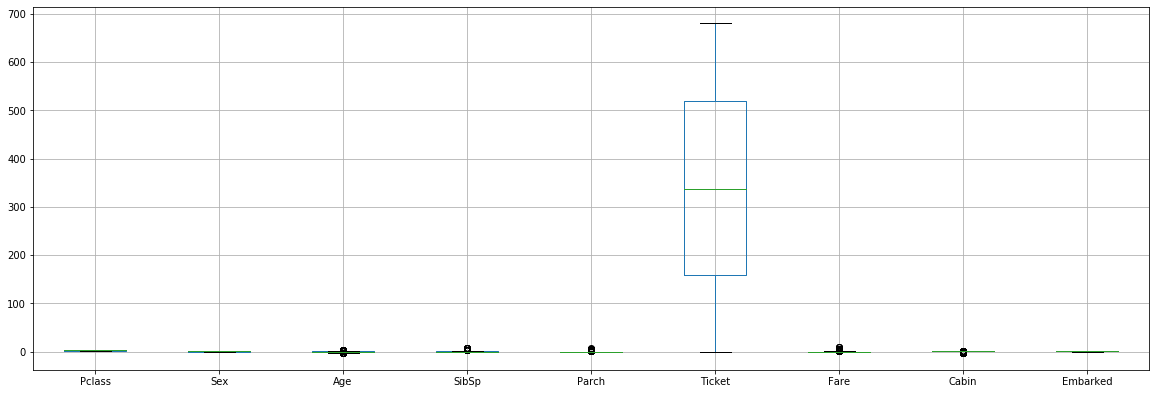

In [46]:
x.iloc[6::].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
#Checking the data distrinution amoung all column

In [48]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin      -2.190675
Embarked   -1.264823
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
pt=power_transform(x, method='yeo-johnson')

In [51]:
x=pd.DataFrame(pt, columns=x.columns)

In [52]:
x.skew()

Pclass     -0.441438
Sex        -0.618921
Age        -0.040150
SibSp       0.833395
Parch       1.231964
Ticket     -0.299695
Fare        0.505493
Cabin      -1.457770
Embarked   -1.064527
dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#Finding best random state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range (1,891):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        print("Best accuracy is",maxAccu,"on Random_state",maxRs)

Best accuracy is 0.8666666666666667 on Random_state 1
Best accuracy is 0.9 on Random_state 4
Best accuracy is 0.9333333333333333 on Random_state 10
Best accuracy is 0.9666666666666667 on Random_state 18


In [55]:
#Creating train test split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 18)

In [56]:
lr=LogisticRegression()

In [57]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predlr= lr.predict(x_test)

In [59]:
predlr

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8059701492537313
[[138  25]
 [ 27  78]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       163
           1       0.76      0.74      0.75       105

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [61]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.832089552238806
[[147  16]
 [ 29  76]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       163
           1       0.83      0.72      0.77       105

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7835820895522388
[[136  27]
 [ 31  74]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       163
           1       0.73      0.70      0.72       105

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [66]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
predknn= knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8097014925373134
[[139  24]
 [ 27  78]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       163
           1       0.76      0.74      0.75       105

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [68]:
#cross validation score

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
scr1= cross_val_score(lr,x,y,cv=5)
print('Cross validation score is :',scr1.mean())

Cross validation score is : 0.7979787835038603


In [71]:
scr2= cross_val_score(svc,x,y,cv=5)
print('Cross validation score is :',scr2.mean())

Cross validation score is : 0.8092084614901763


In [72]:
scr3= cross_val_score(dtc,x,y,cv=5)
print('Cross validation score is :',scr3.mean())

Cross validation score is : 0.7879291946519364


In [73]:
scr4= cross_val_score(knn,x,y,cv=5)
print('Cross validation score is :',scr4.mean())

Cross validation score is : 0.7957629778419434


 From above four algorithms we have seen that decision tree is the best algorithm to predict the test data.

In [74]:
#Hyper perameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
#creating parameter list to pass in GridSearchCV
parameters={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [77]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [78]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [79]:
GCV.best_params_   #Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 5}

In [80]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [81]:
accuracy_score(y_test,GCV_pred)

0.8283582089552238

In [82]:
import joblib
joblib.dump(GCV.best_estimator_,"titanic.pkl")

['titanic.pkl']